# Exploratory Data Analysis (EDA)

## 1. **Load the Dataset:** Start by loading the train.csv dataset into a pandas DataFrame.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training dataset
df = pd.read_csv('train.csv')

df.head()

,id,feedback_text,toxic,abusive,vulgar,menace,offense,bigotry
0,281d77b7bebc2201,:::Sounds good. Let me know when you're done ...,0,0,0,0,0,0
1,716aac7bf3c63db1,"""\nI say something, but it didn't actually con...",0,0,0,0,0,0
2,57cb318c6edcf10c,"""Agustina Barrientos]] \n | Modelo de Piñeiro ...",0,0,0,0,0,0
3,dc3bd70118d91b3a,FYI I enjoy licking strangers scrotal sacks......,1,0,1,0,0,0
4,cf10d41f2997d233,How do you get a site?\nMany penguins have ask...,0,0,0,0,0,0


## 2. **Visualize Label Distribution:** Understand the distribution of the labels (toxic, abusive, vulgar, menace, offense, bigotry).

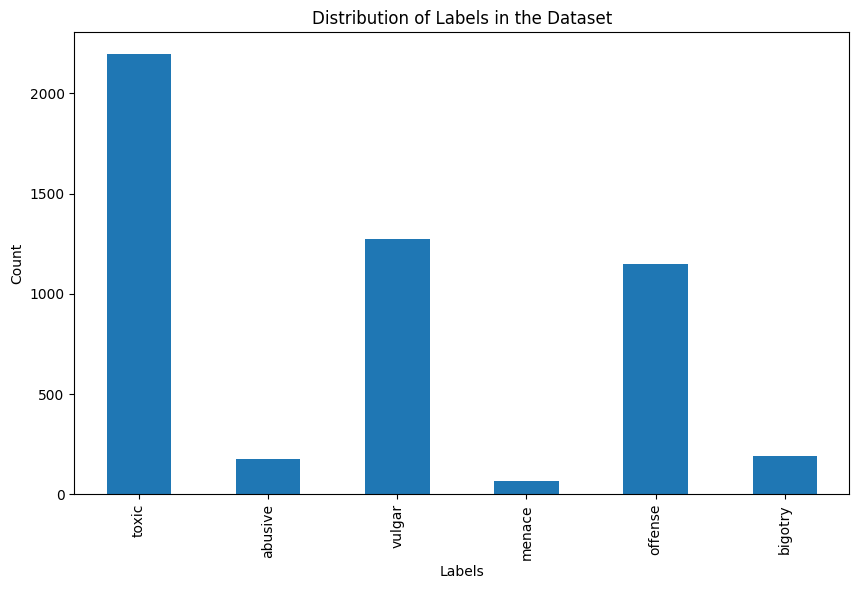

In [4]:
labels = ['toxic','abusive','vulgar','menace','offense','bigotry']
df[labels].sum().plot(kind='bar',figsize=(10,6))
plt.title('Distribution of Labels in the Dataset')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

## 3.**Analyze Sentence Structure:**

 - Calculate the average sentence length (number of words).

 - Plot the distribution of comment lengths.

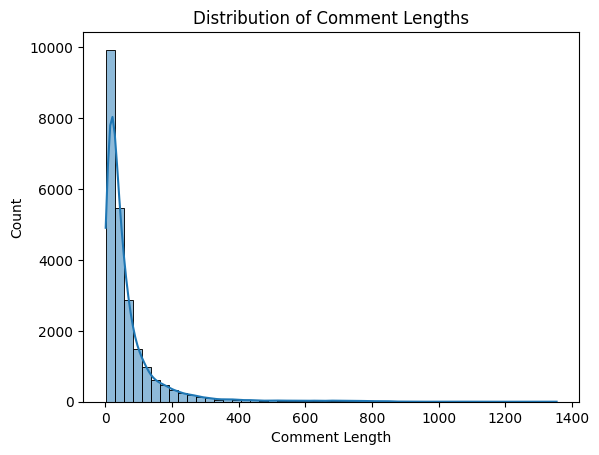

In [6]:
df['text_length'] = df['feedback_text'].apply(lambda x: len(x.split()))

# plot distribution of text length
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Count')
plt.show()

## 4. **Check for Missing Values:**

In [10]:
print(df.isnull().sum())

id               0
feedback_text    0
toxic            0
abusive          0
vulgar           0
menace           0
offense          0
bigotry          0
dtype: int64


## 5. **Check for Outliers:** You can use boxplots to identify potential outliers in numeric columns (e.g., text_length).

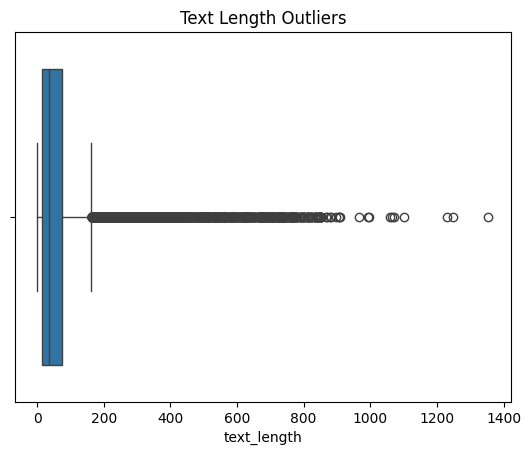

In [8]:
sns.boxplot(x=df['text_length'])
plt.title('Text Length Outliers')
plt.show()

# Text Preprocessing

## 1. **Tokenization:** Split the text into words using a tokenizer using nltk

In [22]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

# Tokenize feedback text
df['tokens'] = df['feedback_text'].apply(word_tokenize)
print(df['tokens'])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


0        [:, :, :, sounds, good, ., let, me, know, when...
1        [``, i, say, something, ,, but, it, did, n't, ...
2        [``, agustina, barrientos, ], ], |, modelo, de...
3        [fyi, i, enjoy, licking, strangers, scrotal, s...
4        [how, do, you, get, a, site, ?, many, penguins...
                               ...                        
23468                    [yo, man, your, pissing, me, off]
23469                       [i, kid, you, not, ,, cunt, .]
23470    [i, think, 's, 22:53, ,, 30, january, 2006, su...
23471    [script, characters, doogie-russell, spaghetti...
23472    [whales, are, mammals, that, take, peoples, mo...
Name: tokens, Length: 23473, dtype: object


## 2. **Lowercasing:** Convert the text to lowercase.

In [19]:
df['feedback_text'] = df['feedback_text'].apply(lambda x: x.lower())
print(df['feedback_text'])

0        :::sounds good.  let me know when you're done ...
1        "\ni say something, but it didn't actually con...
2        "agustina barrientos]] \n | modelo de piñeiro ...
3        fyi i enjoy licking strangers scrotal sacks......
4        how do you get a site?\nmany penguins have ask...
                               ...                        
23468                           yo man your pissing me off
23469                                 i kid you not, cunt.
23470    i think 's 22:53, 30 january 2006 suggestion w...
23471    script \n\n  characters \n\n doogie-russell \n...
23472    whales are mammals that take peoples money and...
Name: feedback_text, Length: 23473, dtype: object


## 3. Remove Stop Words, Special Characters, and Punctuation:

In [21]:
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
def clean_text(text):
  text = ''.join([char for char in text if char not in string.punctuation])
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

df['cleaned_text'] = df['feedback_text'].apply(clean_text)
print(df['cleaned_text'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0             sounds good let know youre done ill start pr
1        say something didnt actually confirm anything ...
2        agustina barrientos modelo de piñeiro juán cru...
3        fyi enjoy licking strangers scrotal sacksespec...
4        get site many penguins asked question simple g...
                               ...                        
23468                                       yo man pissing
23469                                             kid cunt
23470    think 2253 30 january 2006 suggestion mark mol...
23471    script characters doogierussell spaghetti fart...
23472    whales mammals take peoples money spend mcdona...
Name: cleaned_text, Length: 23473, dtype: object


## 4. **Stemming or Lemmatization:** Using nltk

In [23]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

# Apply stemming
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
print(df['cleaned_text'])

0               sound good let know your done ill start pr
1        say someth didnt actual confirm anyth put arti...
2        agustina barriento modelo de piñeiro juán cruz...
3        fyi enjoy lick stranger scrotal sacksespeci ha...
4        get site mani penguin ask question simpl go ww...
                               ...                        
23468                                          yo man piss
23469                                             kid cunt
23470    think 2253 30 januari 2006 suggest mark moldov...
23471    script charact doogierussel spaghetti fartscol...
23472    whale mammal take peopl money spend mcdonadl f...
Name: cleaned_text, Length: 23473, dtype: object


## 5. **Feature Extraction:** Convert text into numeric representations.
 - Use TF-IDF, Word2Vec, or Transformer embeddings.

 - Here's an example using TfidfVectorizer from sklearn.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 543561 stored elements and shape (23473, 5000)>
  Coords	Values
  (0, 4057)	0.3691654099140259
  (0, 1951)	0.2555771530208949
  (0, 2575)	0.2930240850818252
  (0, 2490)	0.2286794229545096
  (0, 4937)	0.29424602363686614
  (0, 1402)	0.2982104112006761
  (0, 2207)	0.3080160897908337
  (0, 4127)	0.30155464718031477
  (0, 3336)	0.5467362595211995
  (1, 3801)	0.1036402489665327
  (1, 4043)	0.12436230963993503
  (1, 1312)	0.1330912831246675
  (1, 176)	0.12427198541497042
  (1, 1017)	0.1678057384993696
  (1, 349)	0.13337539802933862
  (1, 3471)	0.3772530940818962
  (1, 402)	0.07353231021598941
  (1, 3283)	0.19528848236588683
  (1, 2964)	0.17459656014388458
  (1, 2934)	0.11986414640159646
  (1, 2290)	0.1595100077185643
  (1, 874)	0.1542308939952724
  (1, 1603)	0.10991993842366618
  (1, 2604)	0.11464273148476214
  (1, 3031)	0.1797165186994845
  :	:
  (23471, 3902)	0.027663753221670053
  (23471, 4743)	0.0753363219197107
  (23471, 716)

# Model Creation


## 1. **Baseline Model**: Start with Logistic Regression or Random Forest.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val= train_test_split(X,df[labels],test_size=0.2,random_state=42)
log_reg = LogisticRegression()
multi_log_reg = MultiOutputClassifier(log_reg)
model = multi_log_reg.fit(x_train,y_train)
y_pred = model.predict(x_val)

# Model Evaluation


In [42]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc



## Classification Report

In [43]:
print(classification_report(y_val,y_pred,target_names=df[labels].columns))

              precision    recall  f1-score   support

       toxic       0.91      0.44      0.60       431
     abusive       0.36      0.12      0.19        32
      vulgar       0.91      0.50      0.64       249
      menace       0.00      0.00      0.00        20
     offense       0.85      0.38      0.53       230
     bigotry       0.80      0.11      0.19        38

   micro avg       0.88      0.41      0.56      1000
   macro avg       0.64      0.26      0.36      1000
weighted avg       0.85      0.41      0.55      1000
 samples avg       0.04      0.03      0.03      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

## Confusion Matrix

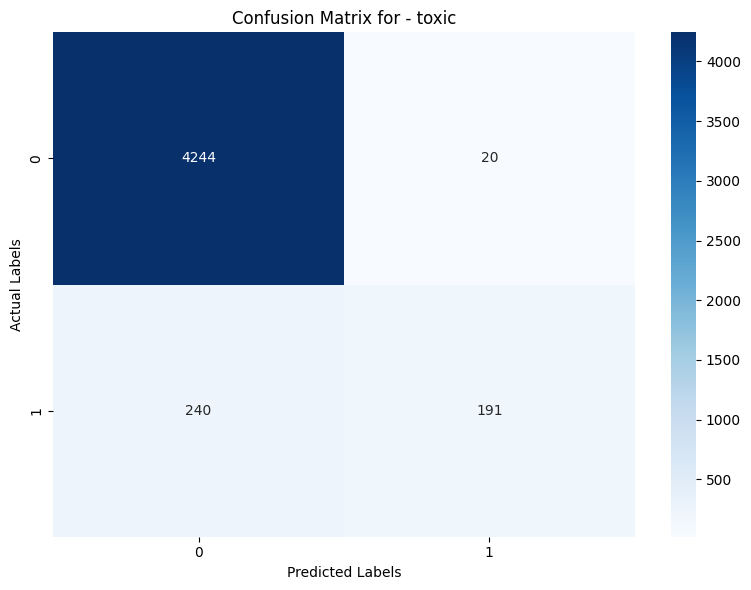

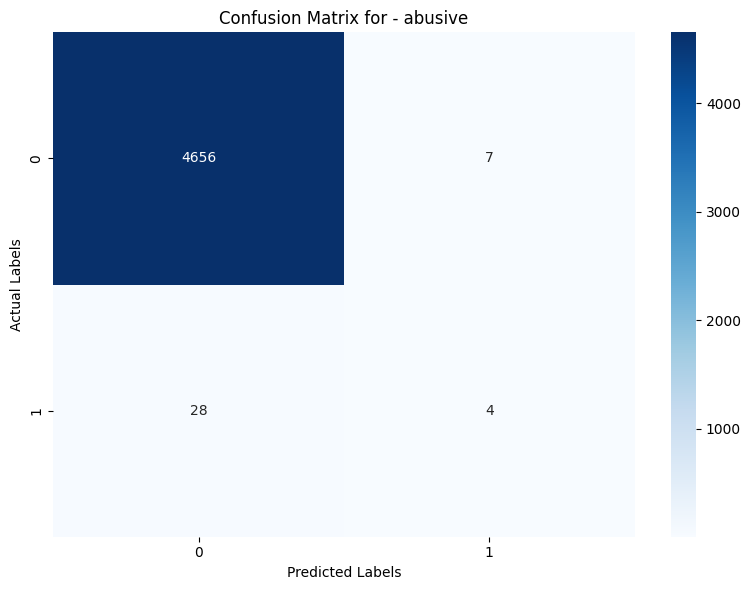

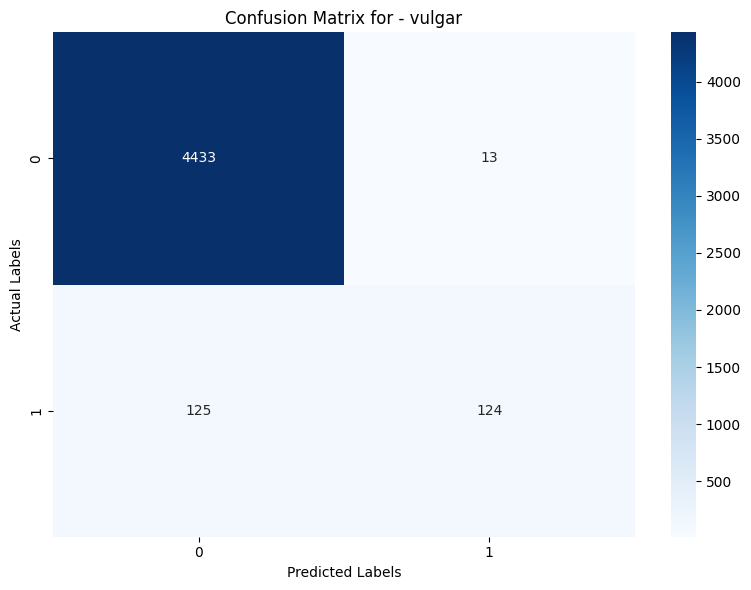

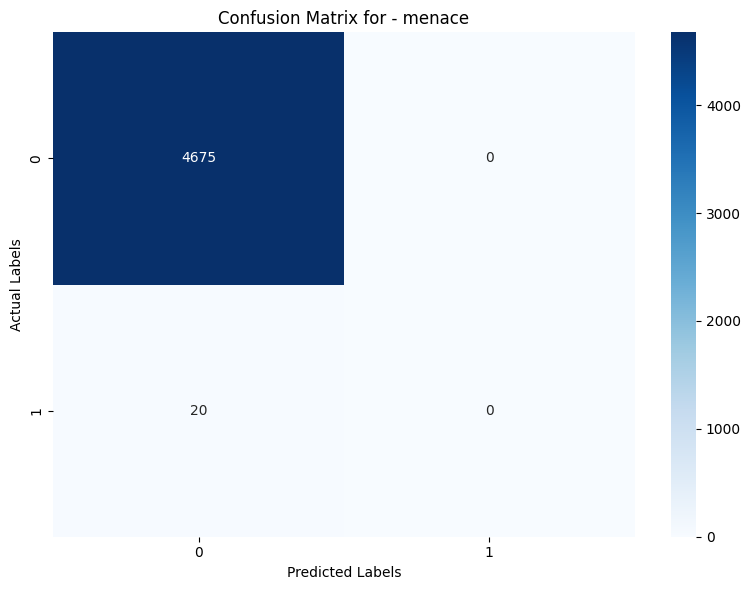

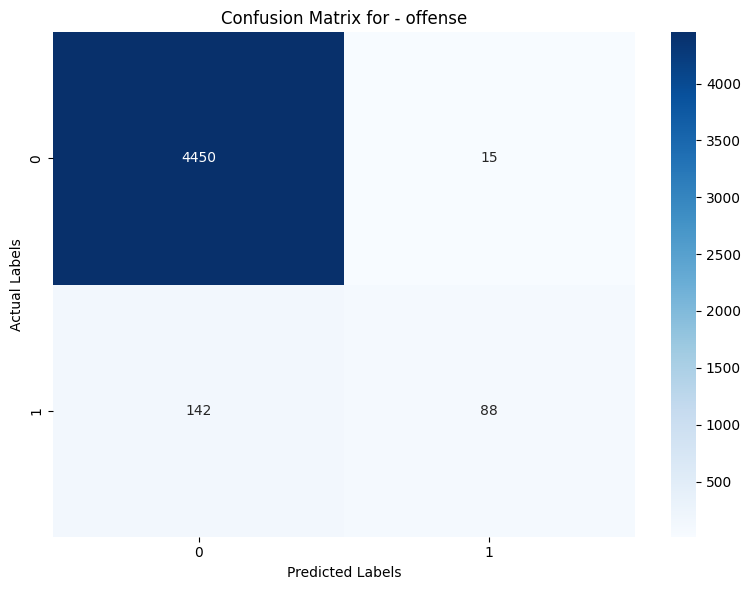

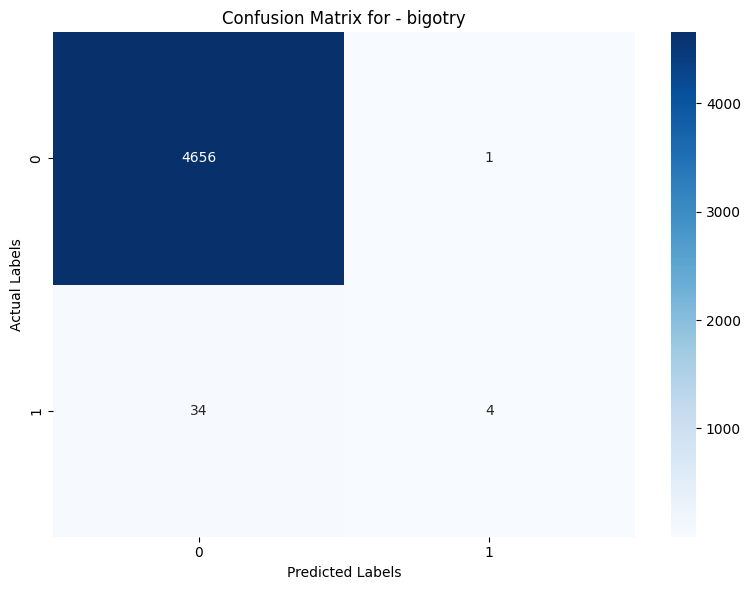

In [44]:
labels = ['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']

for i , label in enumerate(labels):
  cm = confusion_matrix(y_val[label], y_pred[: ,i])
  plt.figure(figsize=(8,6))
  sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
  plt.title(f'Confusion Matrix for - {label}')
  plt.xlabel('Predicted Labels')
  plt.ylabel('Actual Labels')
  plt.tight_layout()
  plt.show()


## ROC-AUC curve for Each Label

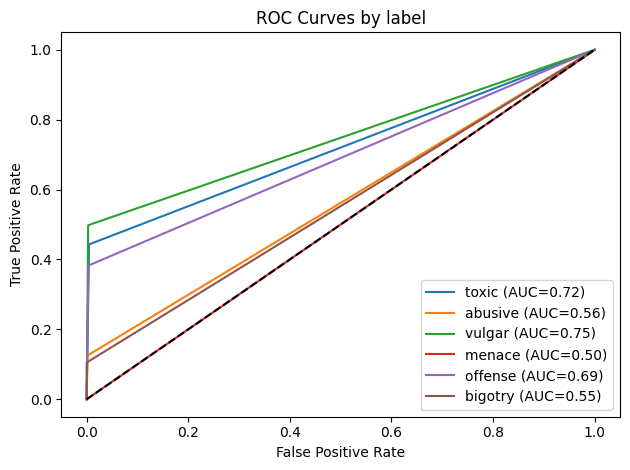

In [45]:
for i ,label in enumerate(labels):
  fpr,tpr,_ = roc_curve(y_val[label],y_pred[:,i])
  roc_auc = auc(fpr,tpr)

  plt.plot(fpr,tpr,label=f'{label} (AUC={roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curves by label')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()